# Simple Moving Average and Relative Strength index Strategy 



This simple moving average strategy is me emulating what is taught by SHARP RESEARCH (Nathan Ford) on his Education Section of his website. 

Link --> https://www.sharpresearch.ai/education

Also used the RSI indicator that was generated by chatgpt

This is to enhance and develop my skills relating to financial analysis and trading using python, numpy, pandas, mathplotlib and jupyter. 

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

All imports with their normal convention

In [12]:
ticker_symbol = 'USF.NZ'

ticker = yf.Ticker(ticker_symbol)

df = ticker.history(period = "max")

Downloading ticker information for Smart US 500 a New Zealand traded ETF that is 99% holding of the SPY 500 

In [13]:
WINDOW = 50

df["Moving Average"] = df['Close'].rolling(WINDOW).mean()


This adds a moving moving 50 day average based off the closing price of USF.NZ

Add what moving average is and how it should help

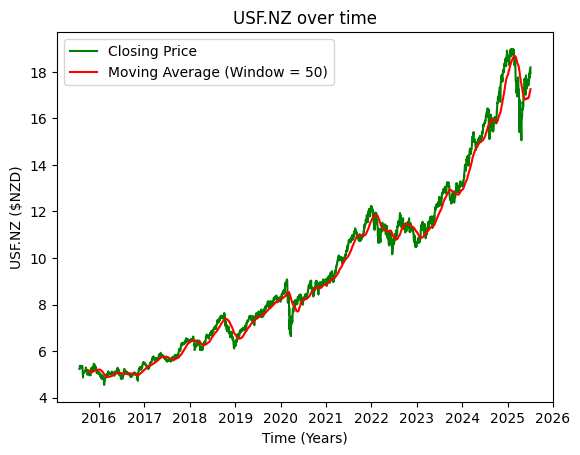

In [14]:
plt.plot(df['Close'], "-g", label = 'Closing Price')
plt.plot(df['Moving Average'], "-r", label = "Moving Average (Window = 50)")

# Titles 
plt.title(f"{ticker_symbol} over time")
plt.xlabel('Time (Years)')
plt.ylabel(f"{ticker_symbol} ($NZD)")
plt.legend()

This is for all time data so would be better for the last 100 days 

Text(0.5, 0, 'Time (days)')

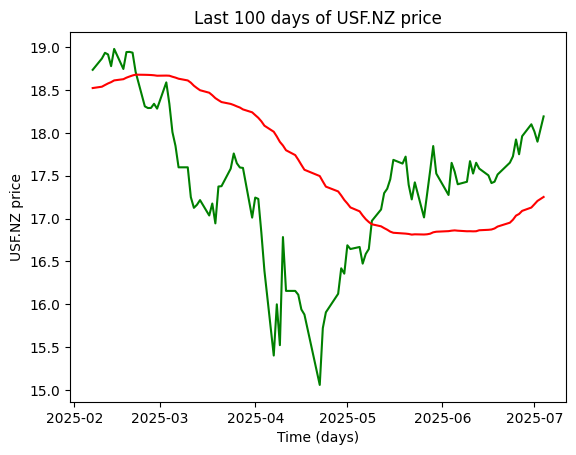

In [15]:
df2 = df.iloc[-100:,:]

plt.plot(df2["Close"], '-g', label = f"{ticker_symbol} closing price")
plt.plot(df2["Moving Average"], '-r', label = f"{ticker_symbol} Moving Average")
plt.title(f"Last 100 days of {ticker_symbol} price")
plt.ylabel(f"{ticker_symbol} price")
plt.xlabel('Time (days)')


This is a plot of the last 100 days of USF.NZ comparing the price and the moving average 

Now for the Relative Strength index strategy 


In [16]:
# Delta
delta = df['Close'].diff()
# Gain
gain = delta.where(delta>0,0)
# Loss
loss = abs(delta.where(delta < 0,0))

avg_gain = gain.rolling(WINDOW).mean()
avg_loss = loss.rolling(WINDOW).mean()

rs = avg_gain/avg_loss

df["RSI"] = 100 - (100 / (1+rs))


Delta is the change in the price from the dat before to current

gain and loss are when the delta is +ve and -ve respectably

then we take the average gain and loss and make them a proportion to each other 

plug into the RSI formula

In [17]:
# Simple backtest
df['Position'] = 0
df.loc[df['Buy'], 'Position'] = 1 # adds a one where buy is true
df.loc[df['Sell'], 'Position'] = -1 # adds a -1 where sell is true

df['Position'] = df['Position'].replace(to_replace=0, method='ffill') # gets rid of 0 position --> do nothing

df['Returns'] = df['Close'].pct_change() # returns if just bought and held
df['Strategy'] = df['Position'].shift(1) * df['Returns'] # returns using the strategy


KeyError: 'Buy'

In [ ]:
# Performance comparison
(1 + df[['Returns', 'Strategy']]).cumprod().plot(title=f"{ticker} RSI+EMA Strategy")
plt.ylabel("Growth of $1")
plt.show()